# CNN

In [1]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from PIL import Image
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import os
import gc
from timeit import default_timer as timer

# Inspect the data

In [2]:
%ls final_dataset

 Volume in drive C is Windows-SSD
 Volume Serial Number is D43D-9ECF

 Directory of C:\Users\mnis9\Seal Eng Image\CV-gpu\final_dataset

05/30/2022  08:36 PM    <DIR>          .
06/03/2022  06:53 AM    <DIR>          ..
05/30/2022  08:36 PM    <DIR>          testing
05/30/2022  08:36 PM    <DIR>          training
05/30/2022  08:36 PM    <DIR>          validation
               0 File(s)              0 bytes
               5 Dir(s)  302,501,699,584 bytes free


In [3]:
import os
# walk through seal_image_datasets directory and list numberof files
for dirpath, dirnames, filenames in os.walk("C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/'.
There are 2 directories and 0 images in 'C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/testing'.
There are 0 directories and 67 images in 'C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/testing\nok'.
There are 0 directories and 67 images in 'C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/testing\ok'.
There are 2 directories and 0 images in 'C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/training'.
There are 0 directories and 315 images in 'C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/training\nok'.
There are 0 directories and 315 images in 'C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/training\ok'.
There are 2 directories and 0 images in 'C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/validation'.
There are 0 directories and 66 images in 'C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/validation\nok'.
There are 0 directories and 66 images in 'C:/Users/mnis

In [4]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/training/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['nok' 'ok']


## View random image 

In [5]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}") # show the shape of the image
    
    return img

Image shape: (2160, 2880, 3)


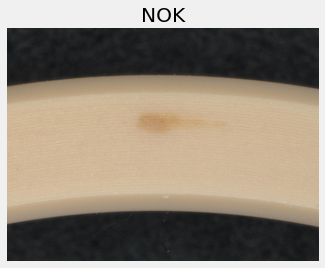

In [6]:
# View a random image from the training dataset
img = view_random_image(target_dir="final_dataset/training/", # C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/
                        target_class="NOK")

Image shape: (2160, 2880, 3)
Image shape: (2160, 2880, 3)


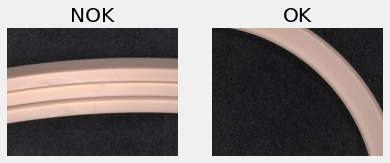

In [7]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
nok_img = view_random_image("final_dataset/training/", "NOK")
plt.subplot(1, 2, 2)
ok_img = view_random_image("final_dataset/training/", "OK")

In [8]:
# View the img (actually just a big array/tensor)
img

array([[[47, 51, 52],
        [42, 46, 47],
        [38, 42, 43],
        ...,
        [36, 37, 39],
        [36, 37, 39],
        [36, 37, 39]],

       [[36, 40, 41],
        [35, 39, 40],
        [34, 38, 39],
        ...,
        [33, 34, 36],
        [33, 34, 36],
        [33, 34, 36]],

       [[37, 41, 42],
        [38, 42, 43],
        [38, 42, 43],
        ...,
        [33, 34, 36],
        [33, 34, 36],
        [32, 33, 35]],

       ...,

       [[19, 20, 22],
        [24, 25, 27],
        [26, 27, 29],
        ...,
        [35, 36, 41],
        [33, 34, 39],
        [32, 33, 38]],

       [[24, 25, 27],
        [27, 28, 30],
        [27, 28, 30],
        ...,
        [33, 34, 39],
        [33, 34, 39],
        [33, 34, 39]],

       [[30, 31, 33],
        [31, 32, 34],
        [29, 30, 32],
        ...,
        [31, 32, 37],
        [33, 34, 39],
        [35, 36, 41]]], dtype=uint8)

In [9]:
# View the image shape
img.shape # returns (width, height, colour channels)

(2160, 2880, 3)

In [10]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.18431373, 0.2       , 0.20392157],
        [0.16470588, 0.18039216, 0.18431373],
        [0.14901961, 0.16470588, 0.16862745],
        ...,
        [0.14117647, 0.14509804, 0.15294118],
        [0.14117647, 0.14509804, 0.15294118],
        [0.14117647, 0.14509804, 0.15294118]],

       [[0.14117647, 0.15686275, 0.16078431],
        [0.1372549 , 0.15294118, 0.15686275],
        [0.13333333, 0.14901961, 0.15294118],
        ...,
        [0.12941176, 0.13333333, 0.14117647],
        [0.12941176, 0.13333333, 0.14117647],
        [0.12941176, 0.13333333, 0.14117647]],

       [[0.14509804, 0.16078431, 0.16470588],
        [0.14901961, 0.16470588, 0.16862745],
        [0.14901961, 0.16470588, 0.16862745],
        ...,
        [0.12941176, 0.13333333, 0.14117647],
        [0.12941176, 0.13333333, 0.14117647],
        [0.1254902 , 0.12941176, 0.1372549 ]],

       ...,

       [[0.0745098 , 0.07843137, 0.08627451],
        [0.09411765, 0.09803922, 0.10588235],
        [0.10196078, 0

### Building an Image Classification Model with CNN

## First Model
As our baseline model, we will build a simple convolutional neural network that takes in images after resizing them to be a square matrix and normalizing all pixel values to range from 0 to 1. The full step is shown below.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
import tensorflow as tf

train_dir = 'C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/training'
test_dir = 'C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/testing'
val_dir = 'C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/validation'

EPOCHS = 100
PATIENCE = 20
INPUT_SHAPE = (256, 256, 3)
IMG_SHAPE = (256, 256)
BATCH_SIZE = 32



model_name = '02_June_CNN.h5'

train_datagen = ImageDataGenerator(rescale = 1/255.)
val_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


# initiating generator that rescale and resize the images in a directory
train_g = train_datagen.flow_from_directory(train_dir,
                                            batch_size = BATCH_SIZE,
                                            target_size = IMG_SHAPE, 
                                            color_mode ='rgb',
                                            shuffle = True,
                                            class_mode = 'binary')                                                                                                                                    
                                                                  
val_g = val_datagen.flow_from_directory(val_dir,
                                        batch_size = BATCH_SIZE,
                                        target_size = IMG_SHAPE, 
                                        color_mode='rgb',
                                        shuffle = False,
                                        class_mode='binary')

test_g = test_datagen.flow_from_directory(test_dir,
                                          batch_size = BATCH_SIZE,
                                          target_size = IMG_SHAPE, 
                                          color_mode='rgb',
                                          class_mode='binary',
                                          shuffle = False)

Found 630 images belonging to 2 classes.
Found 132 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


## Evaluation Metrics

Since we don't want to miss any defect or nok seals, we would prioritize the `recall score`. But our dataset is also skewed towards the positive class (more observation of pneumonia than normal) so by chance the recall score may not capture model's performance well enough. So we will also use accuracy and aim for both high accuracy and recall.

In [12]:
def plot_performance(hist):
    hist_ = hist.history
    epochs = hist.epoch
    
    plt.plot(epochs, hist_['accuracy'], label='Training Accuracy')
    plt.plot(epochs, hist_['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, hist_['loss'], label='Training loss')
    plt.plot(epochs, hist_['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    recall = np.array(hist_['recall'])
    precision = np.array(hist_['precision'])
    val_recall = np.array(hist_['val_recall'])
    val_precision = np.array(hist_['val_precision'])
    plt.figure()
    plt.plot(epochs, 
             2*((recall * precision)/(recall + precision)), 
             label='Training f1')
    plt.plot(epochs, 
             2*((val_recall * val_precision)/(val_recall + val_precision)), 
             label='Validation f1')
    plt.title('Training and validation F1-Score')
    plt.legend()
    
    plt.show()

## Model 01 (Baseline Model)

In [16]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape = INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy', 'Recall', 'Precision'])


# make directory for logs
logdir = os.path.join('C:/Users/mnis9/Seal Eng Image/CV-gpu/logs', model_name)
#os.mkdir(logdir)

# early stopping
cp = EarlyStopping(monitor ='val_loss', mode = 'min', verbose = 2, patience = PATIENCE, restore_best_weights=True)

mc = ModelCheckpoint(model_name, monitor = 'val_loss', mode = 'min', verbose = 2, save_best_only = True)

tsb = TensorBoard(log_dir=logdir)

# training
start = timer()

# Fit the model 
history= model.fit(train_g, 
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_g),
                   validation_data=val_g,
                   validation_steps=len(val_g), 
                   callbacks= [cp, mc, tsb])

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 7.6653 - accuracy: 0.6921 - recall: 0.6413 - precision: 0.7138
Epoch 1: val_loss improved from inf to 1.50697, saving model to 02_June_CNN.h5
20/20 [==============================] - 75s 4s/step - loss: 7.6653 - accuracy: 0.6921 - recall: 0.6413 - precision: 0.7138 - val_loss: 1.5070 - val_accuracy: 0.7576 - val_recall: 0.8788 - val_precision: 0.7073
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.5234 - accuracy: 0.8508 - recall: 0.8413 - precision: 0.8576
Epoch 2: val_loss improved from 1.50697 to 0.29930, saving model to 02_June_CNN.h5
20/20 [==============================] - 66s 3s/step - loss: 0.5234 - accuracy: 0.8508 - recall: 0.8413 - precision: 0.8576 - val_loss: 0.2993 - val_accuracy: 0.8864 - val_recall: 0.8636 - val_precision: 0.9048
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.1778 - accuracy: 0.9397 - recall: 0.9143 - precision: 0.9632
Epoch 3: val_loss im

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 dense (Dense)               (None, 128)               67108992  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 67,110,017
Trainable params: 67,110,017
Non-trainable params: 0
____________________________________________

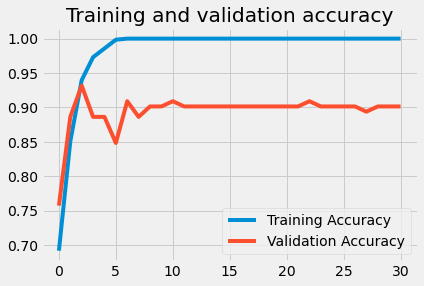

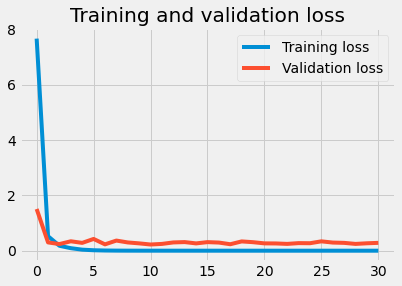

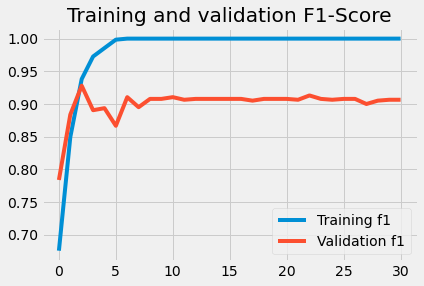

In [19]:
plot_performance(history)

In [20]:
model.evaluate(val_g, workers = 8, verbose = 2)

5/5 - 5s - loss: 0.2237 - accuracy: 0.9091 - recall: 0.9242 - precision: 0.8971 - 5s/epoch - 966ms/step


[0.22370044887065887,
 0.9090909361839294,
 0.9242424368858337,
 0.8970588445663452]

## Model 2

In [21]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape=INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy', 'Recall', 'Precision'])


# make directory for logs
logdir = os.path.join('C:/Users/mnis9/Seal Eng Image/CV-gpu/logs', model_name)
#os.mkdir(logdir)

# early stopping
cp = EarlyStopping(monitor ='val_loss', mode = 'min', verbose = 2, patience = PATIENCE, restore_best_weights=True)

mc = ModelCheckpoint(model_name, monitor = 'val_loss', mode = 'min', verbose = 2, save_best_only = True)

tsb = TensorBoard(log_dir=logdir)

# training
start = timer()

# Fit the model 
history= model.fit(train_g, 
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_g),
                   validation_data=val_g,
                   validation_steps=len(val_g), 
                   callbacks= [cp, mc, tsb])

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 2.1521 - accuracy: 0.6190 - recall: 0.6984 - precision: 0.6027
Epoch 1: val_loss improved from inf to 0.56883, saving model to 02_June_CNN.h5
20/20 [==============================] - 68s 3s/step - loss: 2.1521 - accuracy: 0.6190 - recall: 0.6984 - precision: 0.6027 - val_loss: 0.5688 - val_accuracy: 0.6439 - val_recall: 0.9545 - val_precision: 0.5888
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.4861 - accuracy: 0.7587 - recall: 0.7333 - precision: 0.7726
Epoch 2: val_loss improved from 0.56883 to 0.42596, saving model to 02_June_CNN.h5
20/20 [==============================] - 64s 3s/step - loss: 0.4861 - accuracy: 0.7587 - recall: 0.7333 - precision: 0.7726 - val_loss: 0.4260 - val_accuracy: 0.8485 - val_recall: 0.7121 - val_precision: 0.9792
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.3483 - accuracy: 0.8603 - recall: 0.8032 - precision: 0.9068
Epoch 3: val_loss im

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 262144)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

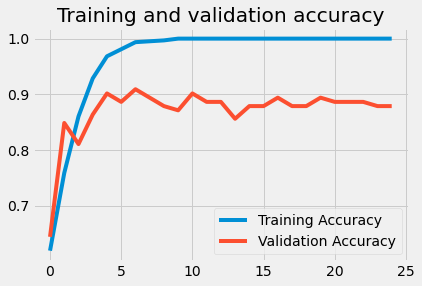

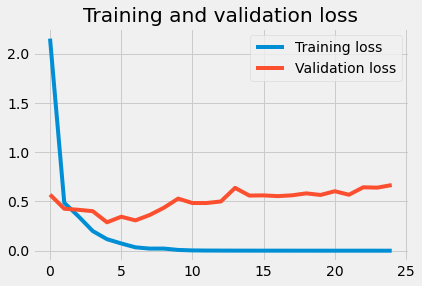

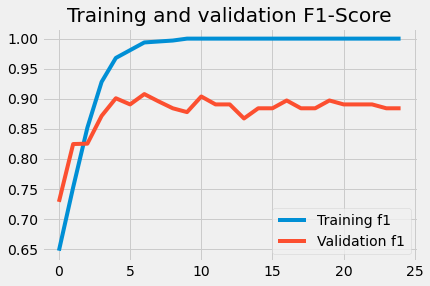

In [23]:
plot_performance(history)

In [24]:
model.evaluate(val_g, workers = 8, verbose = 2)

5/5 - 5s - loss: 0.2883 - accuracy: 0.9015 - recall: 0.8939 - precision: 0.9077 - 5s/epoch - 1s/step


[0.28833433985710144,
 0.9015151262283325,
 0.8939393758773804,
 0.9076923131942749]

## Model 3

In [25]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape=INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy', 'Recall', 'Precision'])


# make directory for logs
logdir = os.path.join('C:/Users/mnis9/Seal Eng Image/CV-gpu/logs', model_name)
#os.mkdir(logdir)

# early stopping
cp = EarlyStopping(monitor ='val_loss', mode = 'min', verbose = 2, patience = PATIENCE, restore_best_weights=True)

mc = ModelCheckpoint(model_name, monitor = 'val_loss', mode = 'min', verbose = 2, save_best_only = True)

tsb = TensorBoard(log_dir=logdir)

# training
start = timer()

# Fit the model 
history= model.fit(train_g, 
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_g),
                   validation_data=val_g,
                   validation_steps=len(val_g), 
                   callbacks= [cp, mc, tsb])

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 1.1888 - accuracy: 0.7111 - recall: 0.6508 - precision: 0.7401
Epoch 1: val_loss improved from inf to 0.39633, saving model to 02_June_CNN.h5
20/20 [==============================] - 76s 4s/step - loss: 1.1888 - accuracy: 0.7111 - recall: 0.6508 - precision: 0.7401 - val_loss: 0.3963 - val_accuracy: 0.8712 - val_recall: 0.8030 - val_precision: 0.9298
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.3593 - accuracy: 0.8492 - recall: 0.8000 - precision: 0.8873
Epoch 2: val_loss improved from 0.39633 to 0.34181, saving model to 02_June_CNN.h5
20/20 [==============================] - 74s 4s/step - loss: 0.3593 - accuracy: 0.8492 - recall: 0.8000 - precision: 0.8873 - val_loss: 0.3418 - val_accuracy: 0.8636 - val_recall: 0.7879 - val_precision: 0.9286
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.2840 - accuracy: 0.8889 - recall: 0.8603 - precision: 0.9125
Epoch 3: val_loss di

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 128)     

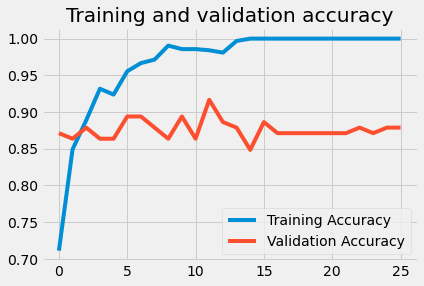

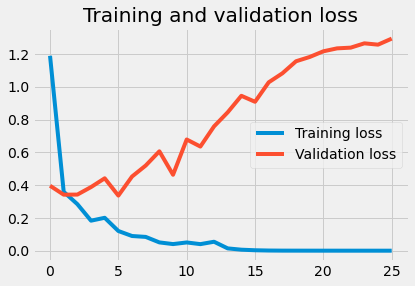

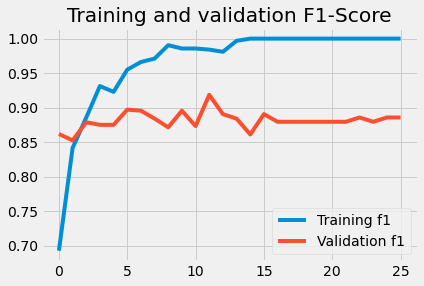

In [27]:
plot_performance(history)

In [28]:
model.evaluate(val_g, workers = 8, verbose = 2)

5/5 - 6s - loss: 0.3362 - accuracy: 0.8939 - recall: 0.9242 - precision: 0.8714 - 6s/epoch - 1s/step


[0.33615630865097046,
 0.8939393758773804,
 0.9242424368858337,
 0.8714285492897034]

## Model 4 (Class weight Balancing)

In [29]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight(class_weight = "balanced", classes = np.unique(train_g.classes) , y = train_g.classes) 
weights = dict(zip([0, 1], weights))

In [30]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape = INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy', 'Recall', 'Precision'])


# make directory for logs
logdir = os.path.join('C:/Users/mnis9/Seal Eng Image/CV-gpu/logs', model_name)
#os.mkdir(logdir)

# early stopping
cp = EarlyStopping(monitor ='val_loss', mode = 'min', verbose = 2, patience = PATIENCE, restore_best_weights=True)

mc = ModelCheckpoint(model_name, monitor = 'val_loss', mode = 'min', verbose = 2, save_best_only = True)

tsb = TensorBoard(log_dir=logdir)

# training
start = timer()

# Fit the model 
history= model.fit(train_g, 
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_g),
                   validation_data=val_g,
                   class_weight = weights,
                   validation_steps=len(val_g), 
                   callbacks= [cp, mc, tsb])

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 1.7510 - accuracy: 0.6698 - recall: 0.6254 - precision: 0.6864
Epoch 1: val_loss improved from inf to 0.47521, saving model to 02_June_CNN.h5
20/20 [==============================] - 78s 4s/step - loss: 1.7510 - accuracy: 0.6698 - recall: 0.6254 - precision: 0.6864 - val_loss: 0.4752 - val_accuracy: 0.8561 - val_recall: 0.7273 - val_precision: 0.9796
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.4189 - accuracy: 0.8238 - recall: 0.7714 - precision: 0.8617
Epoch 2: val_loss improved from 0.47521 to 0.38390, saving model to 02_June_CNN.h5
20/20 [==============================] - 73s 4s/step - loss: 0.4189 - accuracy: 0.8238 - recall: 0.7714 - precision: 0.8617 - val_loss: 0.3839 - val_accuracy: 0.8182 - val_recall: 0.8636 - val_precision: 0.7917
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.3050 - accuracy: 0.8730 - recall: 0.8635 - precision: 0.8803
Epoch 3: val_loss im

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 128)     

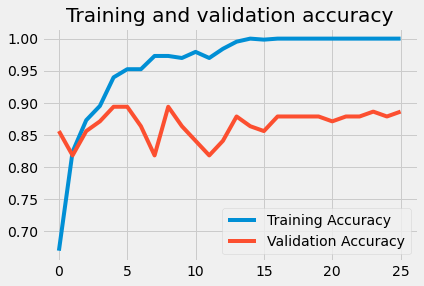

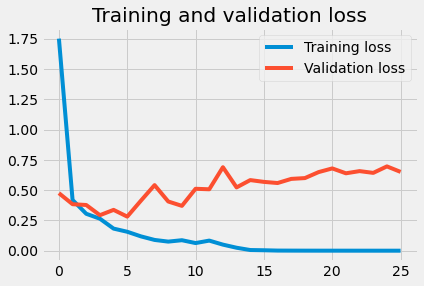

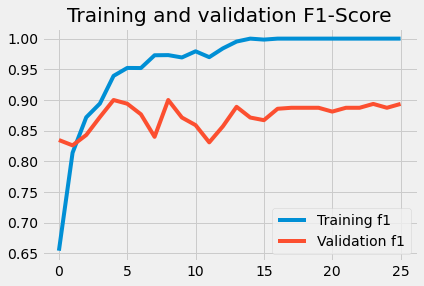

In [34]:
plot_performance(history)

In [35]:
model.evaluate(val_g, workers = 8, verbose = 2)

5/5 - 6s - loss: 0.2815 - accuracy: 0.8939 - recall: 0.8939 - precision: 0.8939 - 6s/epoch - 1s/step


[0.28150826692581177,
 0.8939393758773804,
 0.8939393758773804,
 0.8939393758773804]

In [ ]:
model.save('MODEL/02_June_CNN_Class_Weight_Balancing.h5')

## Model 5 (Data Augmentation + Weight Balance)

In [32]:
# training with augmented data
data_aug_train = image.ImageDataGenerator(rescale = 1/255,
                                          rotation_range = 45,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          zoom_range = 0.2,
                                          horizontal_flip = True)

train_g2 = data_aug_train.flow_from_directory(train_dir,
                                              batch_size = BATCH_SIZE,
                                              target_size = IMG_SHAPE, 
                                              color_mode ='rgb',
                                              shuffle = True,
                                              class_mode = 'binary')

Found 630 images belonging to 2 classes.


In [36]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape = INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy', 'Recall', 'Precision'])


# make directory for logs
logdir = os.path.join('C:/Users/mnis9/Seal Eng Image/CV-gpu/logs', model_name)
#os.mkdir(logdir)

# early stopping
cp = EarlyStopping(monitor ='val_loss', mode = 'min', verbose = 2, patience = PATIENCE, restore_best_weights=True)

mc = ModelCheckpoint(model_name, monitor = 'val_loss', mode = 'min', verbose = 2, save_best_only = True)

tsb = TensorBoard(log_dir=logdir)

# training
start = timer()

# Fit the model 
history= model.fit(train_g2, 
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_g),
                   validation_data=val_g,
                   class_weight = weights,
                   validation_steps=len(val_g), 
                   callbacks= [cp, mc, tsb])

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 1.2905 - accuracy: 0.5619 - recall: 0.4095 - precision: 0.5890
Epoch 1: val_loss improved from inf to 0.72007, saving model to 02_June_CNN.h5
20/20 [==============================] - 84s 4s/step - loss: 1.2905 - accuracy: 0.5619 - recall: 0.4095 - precision: 0.5890 - val_loss: 0.7201 - val_accuracy: 0.5076 - val_recall: 1.0000 - val_precision: 0.5038
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.6420 - accuracy: 0.6476 - recall: 0.5016 - precision: 0.7085
Epoch 2: val_loss improved from 0.72007 to 0.47759, saving model to 02_June_CNN.h5
20/20 [==============================] - 81s 4s/step - loss: 0.6420 - accuracy: 0.6476 - recall: 0.5016 - precision: 0.7085 - val_loss: 0.4776 - val_accuracy: 0.8333 - val_recall: 0.6970 - val_precision: 0.9583
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.5704 - accuracy: 0.7016 - recall: 0.6571 - precision: 0.7213
Epoch 3: val_loss im

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 32, 32, 128)     

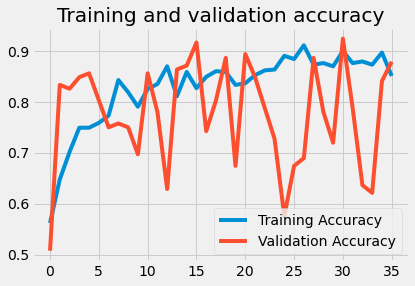

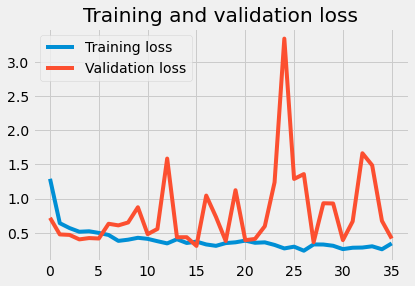

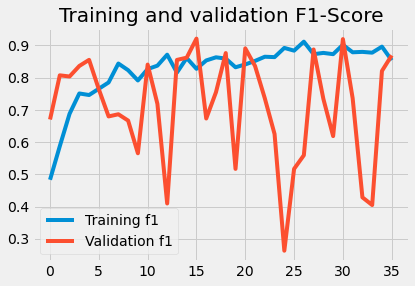

In [39]:
plot_performance(history)

In [40]:
model.evaluate(val_g, workers = 8, verbose = 2)

5/5 - 6s - loss: 0.4207 - accuracy: 0.8561 - recall: 0.8182 - precision: 0.8852 - 6s/epoch - 1s/step


[0.42072710394859314,
 0.8560606241226196,
 0.8181818127632141,
 0.8852459192276001]

In [41]:
model.save('MODEL/02_June_CNN_Data Augmentation_Class_Weights.h5')

# Model 04: Less Data Augmentation

In [14]:
# training with augmented data
data_aug_train = image.ImageDataGenerator(rescale = 1/255,
                                          rotation_range = 20,
                                          width_shift_range = 0.1,
                                          height_shift_range = 0.1,
                                          zoom_range = 0.1,
                                          horizontal_flip = True)

train_g3 = data_aug_train.flow_from_directory(train_dir,
                                              batch_size = BATCH_SIZE,
                                              target_size = IMG_SHAPE, 
                                              color_mode ='rgb',
                                              shuffle = True,
                                              class_mode = 'binary')

Found 630 images belonging to 2 classes.


In [44]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape = INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy', 'Recall', 'Precision'])


# make directory for logs
logdir = os.path.join('C:/Users/mnis9/Seal Eng Image/CV-gpu/logs', model_name)
#os.mkdir(logdir)

# early stopping
cp = EarlyStopping(monitor ='val_loss', mode = 'min', verbose = 2, patience = PATIENCE, restore_best_weights=True)

mc = ModelCheckpoint(model_name, monitor = 'val_loss', mode = 'min', verbose = 2, save_best_only = True)

tsb = TensorBoard(log_dir=logdir)

# training
start = timer()

# Fit the model 
history= model.fit(train_g3, 
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_g),
                   validation_data=val_g,
                   validation_steps=len(val_g), 
                   callbacks= [cp, mc, tsb])

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 1.1615 - accuracy: 0.6190 - recall: 0.5778 - precision: 0.6298
Epoch 1: val_loss improved from inf to 0.46511, saving model to 02_June_CNN.h5
20/20 [==============================] - 94s 5s/step - loss: 1.1615 - accuracy: 0.6190 - recall: 0.5778 - precision: 0.6298 - val_loss: 0.4651 - val_accuracy: 0.7803 - val_recall: 0.6212 - val_precision: 0.9111
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.5291 - accuracy: 0.7460 - recall: 0.6984 - precision: 0.7719
Epoch 2: val_loss improved from 0.46511 to 0.41260, saving model to 02_June_CNN.h5
20/20 [==============================] - 89s 5s/step - loss: 0.5291 - accuracy: 0.7460 - recall: 0.6984 - precision: 0.7719 - val_loss: 0.4126 - val_accuracy: 0.8333 - val_recall: 0.7273 - val_precision: 0.9231
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.4705 - accuracy: 0.7683 - recall: 0.7302 - precision: 0.7904
Epoch 3: val_loss di

In [45]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 32, 32, 128)     

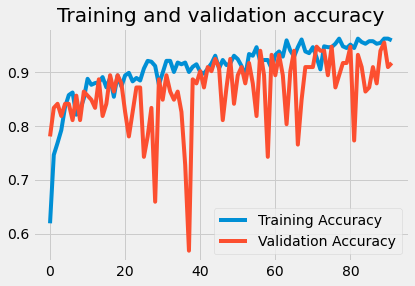

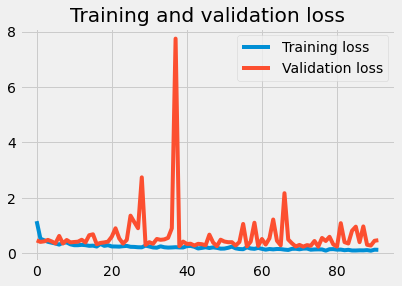

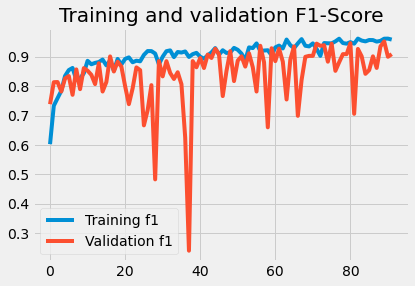

In [46]:
plot_performance(history)

In [47]:
model.evaluate(val_g, workers = 8, verbose = 2)

5/5 - 5s - loss: 0.2422 - accuracy: 0.9470 - recall: 0.9091 - precision: 0.9836 - 5s/epoch - 1s/step


[0.24223065376281738,
 0.9469696879386902,
 0.9090909361839294,
 0.9836065769195557]

In [48]:
model.save('MODEL/02_June_CNN_Less_Data Augmentation.h5')

## Model 06 (Less Augmented data with balancing class weights)

In [49]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape = INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy', 'Recall', 'Precision'])


# make directory for logs
logdir = os.path.join('C:/Users/mnis9/Seal Eng Image/CV-gpu/logs', model_name)
#os.mkdir(logdir)

# early stopping
cp = EarlyStopping(monitor ='val_loss', mode = 'min', verbose = 2, patience = PATIENCE, restore_best_weights=True)

mc = ModelCheckpoint(model_name, monitor = 'val_loss', mode = 'min', verbose = 2, save_best_only = True)

tsb = TensorBoard(log_dir=logdir)

# training
start = timer()

# Fit the model 
history= model.fit(train_g3, 
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_g),
                   validation_data=val_g,
                   class_weight = weights,
                   validation_steps=len(val_g), 
                   callbacks= [cp, mc, tsb])

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 1.5245 - accuracy: 0.5016 - recall: 0.4000 - precision: 0.5020
Epoch 1: val_loss improved from inf to 0.58373, saving model to 02_June_CNN.h5
20/20 [==============================] - 78s 4s/step - loss: 1.5245 - accuracy: 0.5016 - recall: 0.4000 - precision: 0.5020 - val_loss: 0.5837 - val_accuracy: 0.8258 - val_recall: 0.7273 - val_precision: 0.9057
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.5570 - accuracy: 0.7333 - recall: 0.6698 - precision: 0.7673
Epoch 2: val_loss improved from 0.58373 to 0.46422, saving model to 02_June_CNN.h5
20/20 [==============================] - 77s 4s/step - loss: 0.5570 - accuracy: 0.7333 - recall: 0.6698 - precision: 0.7673 - val_loss: 0.4642 - val_accuracy: 0.7955 - val_recall: 0.7727 - val_precision: 0.8095
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.4910 - accuracy: 0.7429 - recall: 0.6730 - precision: 0.7823
Epoch 3: val_loss im

In [50]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 32, 32, 128)     

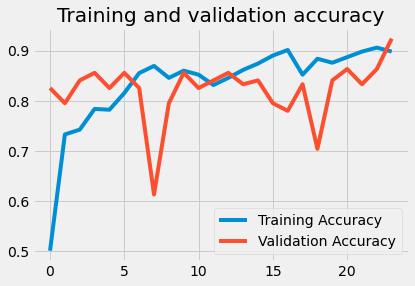

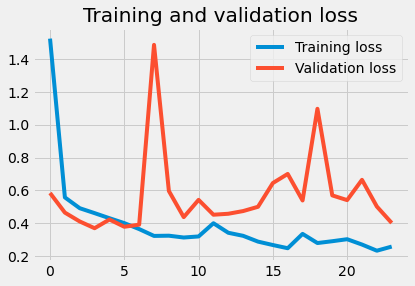

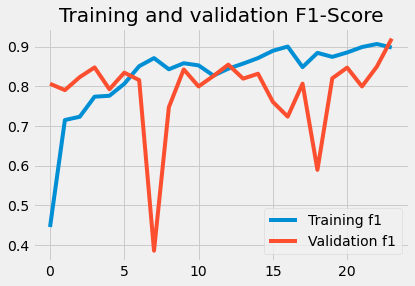

In [51]:
plot_performance(history)

In [52]:
model.evaluate(val_g, workers = 8, verbose = 2)

5/5 - 5s - loss: 0.3691 - accuracy: 0.8561 - recall: 0.8030 - precision: 0.8983 - 5s/epoch - 1s/step


[0.369133323431015, 0.8560606241226196, 0.8030303120613098, 0.8983050584793091]

In [53]:
model.save('MODEL/02_June_CNN_Less_Data_Augmentation_Class_Weight_Balancing.h5')

## Model 07 (More layer + Data Augmentation)

In [54]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape = INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy', 'Recall', 'Precision'])


# make directory for logs
logdir = os.path.join('C:/Users/mnis9/Seal Eng Image/CV-gpu/logs', model_name)
#os.mkdir(logdir)

# early stopping
cp = EarlyStopping(monitor ='val_loss', mode = 'min', verbose = 2, patience = PATIENCE, restore_best_weights=True)

mc = ModelCheckpoint(model_name, monitor = 'val_loss', mode = 'min', verbose = 2, save_best_only = True)

tsb = TensorBoard(log_dir=logdir)

# training
start = timer()

# Fit the model 
history= model.fit(train_g3, 
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_g),
                   validation_data=val_g,
                   validation_steps=len(val_g), 
                   callbacks= [cp, mc, tsb])

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 1.1371 - accuracy: 0.6238 - recall: 0.6222 - precision: 0.6242
Epoch 1: val_loss improved from inf to 0.62985, saving model to 02_June_CNN.h5
20/20 [==============================] - 80s 4s/step - loss: 1.1371 - accuracy: 0.6238 - recall: 0.6222 - precision: 0.6242 - val_loss: 0.6298 - val_accuracy: 0.5909 - val_recall: 0.1970 - val_precision: 0.9286
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.5401 - accuracy: 0.7397 - recall: 0.6349 - precision: 0.8032
Epoch 2: val_loss improved from 0.62985 to 0.45262, saving model to 02_June_CNN.h5
20/20 [==============================] - 78s 4s/step - loss: 0.5401 - accuracy: 0.7397 - recall: 0.6349 - precision: 0.8032 - val_loss: 0.4526 - val_accuracy: 0.8106 - val_recall: 0.6515 - val_precision: 0.9556
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.4924 - accuracy: 0.7492 - recall: 0.6317 - precision: 0.8257
Epoch 3: val_loss im

In [55]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 32, 32, 128)     

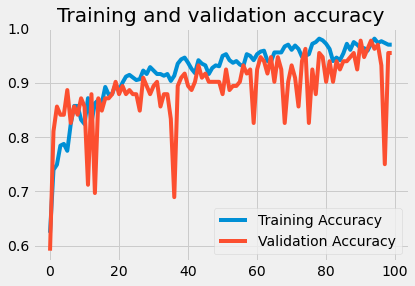

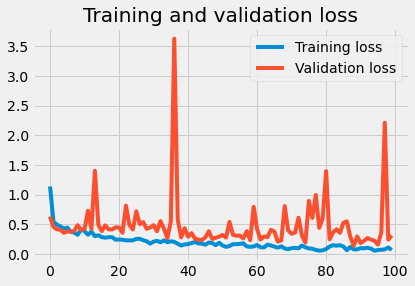

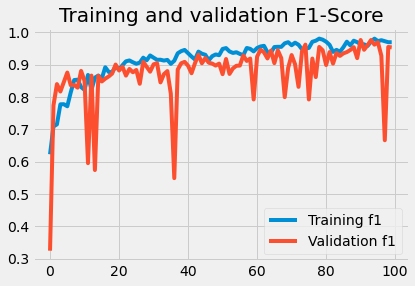

In [56]:
plot_performance(history)

In [57]:
model.evaluate(val_g, workers = 8, verbose = 2)

5/5 - 6s - loss: 0.3102 - accuracy: 0.9545 - recall: 0.9394 - precision: 0.9688 - 6s/epoch - 1s/step


[0.31015244126319885, 0.9545454382896423, 0.939393937587738, 0.96875]

In [58]:
model.save('MODEL/02_June_CNN_Data_Augmentation_More_layer.h5')

## Model 08 (More_More_layer + Data Augmentation)

In [59]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape=INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy', 'Recall', 'Precision'])


# make directory for logs
logdir = os.path.join('C:/Users/mnis9/Seal Eng Image/CV-gpu/logs', model_name)
#os.mkdir(logdir)

# early stopping
cp = EarlyStopping(monitor ='val_loss', mode = 'min', verbose = 2, patience = PATIENCE, restore_best_weights=True)

mc = ModelCheckpoint(model_name, monitor = 'val_loss', mode = 'min', verbose = 2, save_best_only = True)

tsb = TensorBoard(log_dir=logdir)

# training
start = timer()

# Fit the model 
history= model.fit(train_g3, 
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_g),
                   validation_data=val_g,
                   validation_steps=len(val_g), 
                   callbacks= [cp, mc, tsb])

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.6891 - accuracy: 0.6508 - recall: 0.5746 - precision: 0.6779
Epoch 1: val_loss improved from inf to 0.44666, saving model to 02_June_CNN.h5
20/20 [==============================] - 84s 4s/step - loss: 0.6891 - accuracy: 0.6508 - recall: 0.5746 - precision: 0.6779 - val_loss: 0.4467 - val_accuracy: 0.8106 - val_recall: 0.8182 - val_precision: 0.8060
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.5308 - accuracy: 0.7540 - recall: 0.6667 - precision: 0.8077
Epoch 2: val_loss did not improve from 0.44666
20/20 [==============================] - 79s 4s/step - loss: 0.5308 - accuracy: 0.7540 - recall: 0.6667 - precision: 0.8077 - val_loss: 0.4509 - val_accuracy: 0.8258 - val_recall: 0.7121 - val_precision: 0.9216
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.4706 - accuracy: 0.7714 - recall: 0.7270 - precision: 0.7979
Epoch 3: val_loss improved from 0.44666 to 0.43515, savi

KeyboardInterrupt: 

In [ ]:
plot_performance(history)
model.evaluate(val_g, workers = 8, verbose = 2)

In [ ]:
model.summary()

In [ ]:
model.save('MODEL/02_June_CNN_Data_Augmentation_More_More_layer.h5')

## Model 09 (Change_First_layer + Data Augmentation)

In [15]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(64, 7, activation = 'relu', padding = 'same', input_shape=INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 5, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy', 'Recall', 'Precision'])


# make directory for logs
logdir = os.path.join('C:/Users/mnis9/Seal Eng Image/CV-gpu/logs', model_name)
#os.mkdir(logdir)

# early stopping
cp = EarlyStopping(monitor ='val_loss', mode = 'min', verbose = 2, patience = PATIENCE, restore_best_weights=True)

mc = ModelCheckpoint(model_name, monitor = 'val_loss', mode = 'min', verbose = 2, save_best_only = True)

tsb = TensorBoard(log_dir=logdir)

# training
start = timer()

# Fit the model 
history= model.fit(train_g3, 
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_g),
                   validation_data=val_g,
                   validation_steps=len(val_g), 
                   callbacks= [cp, mc, tsb])

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 1.1976 - accuracy: 0.6683 - recall: 0.5492 - precision: 0.7208
Epoch 1: val_loss improved from inf to 0.66733, saving model to 02_June_CNN.h5
20/20 [==============================] - 212s 10s/step - loss: 1.1976 - accuracy: 0.6683 - recall: 0.5492 - precision: 0.7208 - val_loss: 0.6673 - val_accuracy: 0.7727 - val_recall: 0.8333 - val_precision: 0.7432
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.5919 - accuracy: 0.6952 - recall: 0.5968 - precision: 0.7431
Epoch 2: val_loss improved from 0.66733 to 0.49956, saving model to 02_June_CNN.h5
20/20 [==============================] - 209s 10s/step - loss: 0.5919 - accuracy: 0.6952 - recall: 0.5968 - precision: 0.7431 - val_loss: 0.4996 - val_accuracy: 0.7576 - val_recall: 0.8788 - val_precision: 0.7073
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.5180 - accuracy: 0.7556 - recall: 0.6921 - precision: 0.7927
Epoch 3: val_los

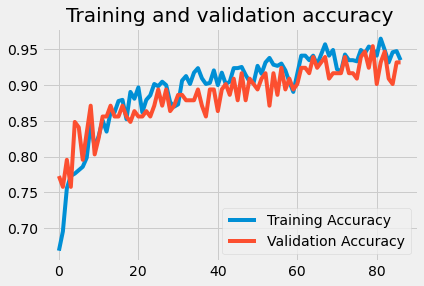

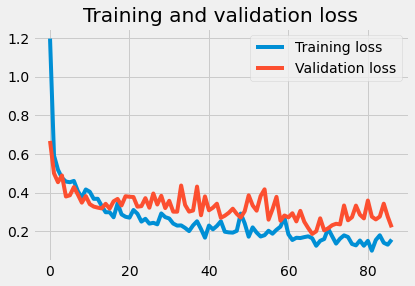

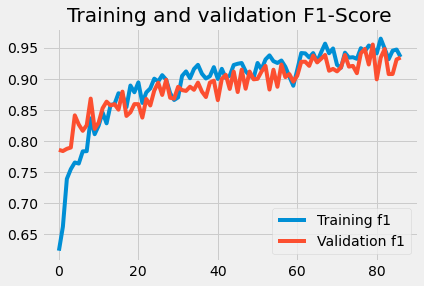

5/5 - 13s - loss: 0.1854 - accuracy: 0.9318 - recall: 0.9394 - precision: 0.9254 - 13s/epoch - 3s/step


[0.18539629876613617,
 0.9318181872367859,
 0.939393937587738,
 0.9253731369972229]

In [17]:
plot_performance(history)
model.evaluate(val_g, workers = 8, verbose = 2)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 64)      9472      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 128)     204928    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 256)     

In [19]:
model.save('MODEL/02_June_CNN_Data_Augmentation_updated_layer.h5')

## Model 10 :  More Data Augmentation 

In [53]:
# training with augmented data
data_aug_train = image.ImageDataGenerator(rescale = 1/255,
                                          rotation_range = 40,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          shear_range = 0.2,
                                          zoom_range = 0.2,
                                          horizontal_flip = True)

train_g4 = data_aug_train.flow_from_directory(train_dir,
                                              batch_size = BATCH_SIZE,
                                              target_size = IMG_SHAPE, 
                                              color_mode ='rgb',
                                              shuffle = True,
                                              class_mode = 'binary')

Found 630 images belonging to 2 classes.


In [54]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape=INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy', 'Recall', 'Precision'])


# make directory for logs
logdir = os.path.join('C:/Users/mnis9/Seal Eng Image/CV-gpu/logs', model_name)
#os.mkdir(logdir)

# early stopping
cp = EarlyStopping(monitor ='val_loss', mode = 'min', verbose = 2, patience = PATIENCE, restore_best_weights=True)

mc = ModelCheckpoint(model_name, monitor = 'val_loss', mode = 'min', verbose = 2, save_best_only = True)

tsb = TensorBoard(log_dir=logdir)

# training
start = timer()

# Fit the model 
history= model.fit(train_g4, 
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_g),
                   validation_data=val_g,
                   validation_steps=len(val_g), 
                   callbacks= [cp, mc, tsb])

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.7635 - accuracy: 0.5921 - recall: 0.5905 - precision: 0.5924
Epoch 1: val_loss improved from inf to 0.54042, saving model to 02_June_CNN.h5
20/20 [==============================] - 101s 5s/step - loss: 0.7635 - accuracy: 0.5921 - recall: 0.5905 - precision: 0.5924 - val_loss: 0.5404 - val_accuracy: 0.8409 - val_recall: 0.7121 - val_precision: 0.9592
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.5871 - accuracy: 0.7111 - recall: 0.6413 - precision: 0.7454
Epoch 2: val_loss improved from 0.54042 to 0.53176, saving model to 02_June_CNN.h5
20/20 [==============================] - 93s 5s/step - loss: 0.5871 - accuracy: 0.7111 - recall: 0.6413 - precision: 0.7454 - val_loss: 0.5318 - val_accuracy: 0.8409 - val_recall: 0.7879 - val_precision: 0.8814
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.6166 - accuracy: 0.6683 - recall: 0.5365 - precision: 0.7284
Epoch 3: val_loss d

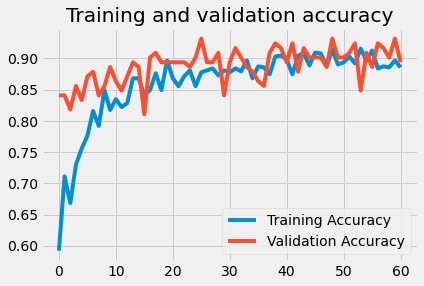

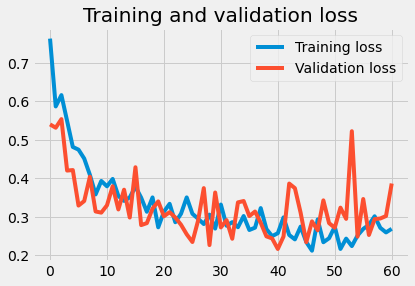

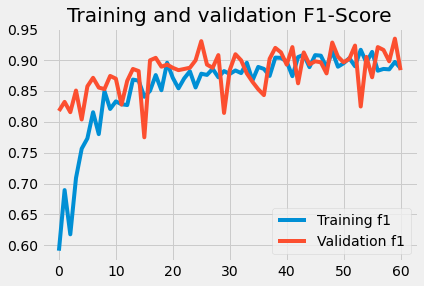

5/5 - 7s - loss: 0.2164 - accuracy: 0.8939 - recall: 0.8788 - precision: 0.9062 - 7s/epoch - 1s/step


[0.2164110541343689, 0.8939393758773804, 0.8787878751754761, 0.90625]

In [55]:
plot_performance(history)
model.evaluate(val_g, workers = 8, verbose = 2)

In [ ]:
model.summary()

In [ ]:
model.save('MODEL/02_June_CNN_Another_Data_Augmentation.h5')

## Model 11: Less Data Augmentaion + low learning rate

In [57]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(64, 7, activation = 'relu', padding = 'same', input_shape=INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 5, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics=['accuracy', 'Recall', 'Precision'])


# make directory for logs
logdir = os.path.join('C:/Users/mnis9/Seal Eng Image/CV-gpu/logs', model_name)
#os.mkdir(logdir)

# early stopping
cp = EarlyStopping(monitor ='val_loss', mode = 'min', verbose = 2, patience = PATIENCE, restore_best_weights=True)

mc = ModelCheckpoint(model_name, monitor = 'val_loss', mode = 'min', verbose = 2, save_best_only = True)

tsb = TensorBoard(log_dir=logdir)

# training
start = timer()

# Fit the model 
history= model.fit(train_g3, 
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_g),
                   validation_data=val_g,
                   validation_steps=len(val_g), 
                   callbacks= [cp, mc, tsb])

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.6275 - accuracy: 0.6698 - recall: 0.7016 - precision: 0.6597
Epoch 1: val_loss improved from inf to 0.43087, saving model to 02_June_CNN.h5
20/20 [==============================] - 211s 10s/step - loss: 0.6275 - accuracy: 0.6698 - recall: 0.7016 - precision: 0.6597 - val_loss: 0.4309 - val_accuracy: 0.8258 - val_recall: 0.6970 - val_precision: 0.9388
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.4988 - accuracy: 0.7413 - recall: 0.6222 - precision: 0.8167
Epoch 2: val_loss did not improve from 0.43087
20/20 [==============================] - 197s 10s/step - loss: 0.4988 - accuracy: 0.7413 - recall: 0.6222 - precision: 0.8167 - val_loss: 0.4310 - val_accuracy: 0.8485 - val_recall: 0.8030 - val_precision: 0.8833
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.4676 - accuracy: 0.7603 - recall: 0.6667 - precision: 0.8203
Epoch 3: val_loss improved from 0.43087 to 0.40138, 

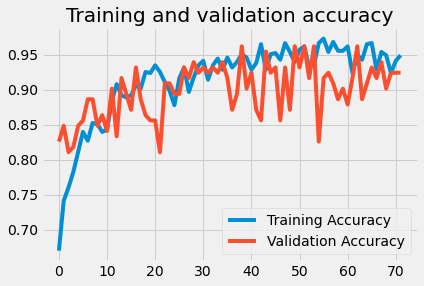

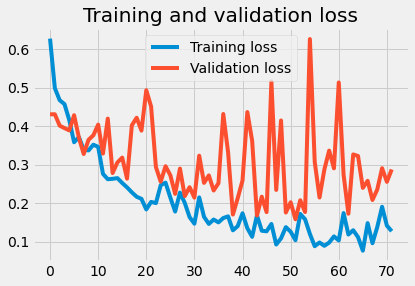

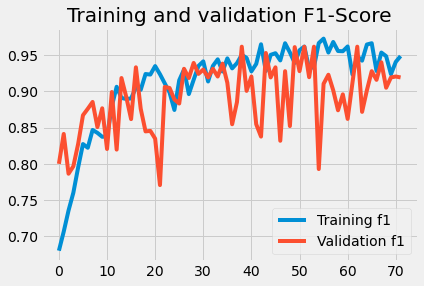

5/5 - 12s - loss: 0.1583 - accuracy: 0.9621 - recall: 0.9545 - precision: 0.9692 - 12s/epoch - 2s/step


[0.15825507044792175,
 0.9621211886405945,
 0.9545454382896423,
 0.9692307710647583]

In [58]:
plot_performance(history)
model.evaluate(val_g, workers = 8, verbose = 2)

In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 256, 256, 64)      9472      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 128, 128, 128)     204928    
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 32, 32, 256)     

In [60]:
model.save('MODEL/04_June_CNN_Less_Data_Augmentation_low_learning_rate.h5')

## Model 12: Less Augmentation + Dropout

In [62]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(64, 7, activation = 'relu', padding = 'same', input_shape=INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 5, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2048, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=['accuracy', 'Recall', 'Precision'])


# make directory for logs
logdir = os.path.join('C:/Users/mnis9/Seal Eng Image/CV-gpu/logs', model_name)
#os.mkdir(logdir)

# early stopping
cp = EarlyStopping(monitor ='val_loss', mode = 'min', verbose = 2, patience = PATIENCE, restore_best_weights=True)

mc = ModelCheckpoint(model_name, monitor = 'val_loss', mode = 'min', verbose = 2, save_best_only = True)

tsb = TensorBoard(log_dir=logdir)

# training
start = timer()

# Fit the model 
history= model.fit(train_g3, 
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_g),
                   validation_data=val_g,
                   validation_steps=len(val_g), 
                   callbacks= [cp, mc, tsb])

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.8438 - accuracy: 0.5619 - recall: 0.7111 - precision: 0.5477
Epoch 1: val_loss improved from inf to 0.47915, saving model to 02_June_CNN.h5
20/20 [==============================] - 195s 10s/step - loss: 0.8438 - accuracy: 0.5619 - recall: 0.7111 - precision: 0.5477 - val_loss: 0.4792 - val_accuracy: 0.7955 - val_recall: 0.7576 - val_precision: 0.8197
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.5146 - accuracy: 0.7540 - recall: 0.6444 - precision: 0.8252
Epoch 2: val_loss improved from 0.47915 to 0.44621, saving model to 02_June_CNN.h5
20/20 [==============================] - 186s 9s/step - loss: 0.5146 - accuracy: 0.7540 - recall: 0.6444 - precision: 0.8252 - val_loss: 0.4462 - val_accuracy: 0.8333 - val_recall: 0.7273 - val_precision: 0.9231
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.5358 - accuracy: 0.7444 - recall: 0.6889 - precision: 0.7750
Epoch 3: val_loss

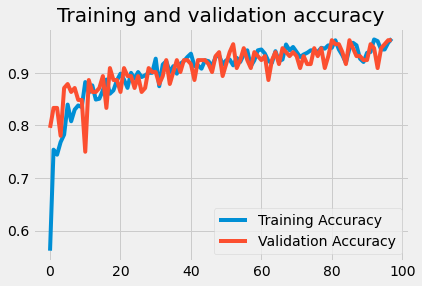

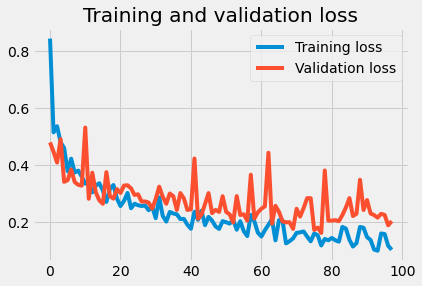

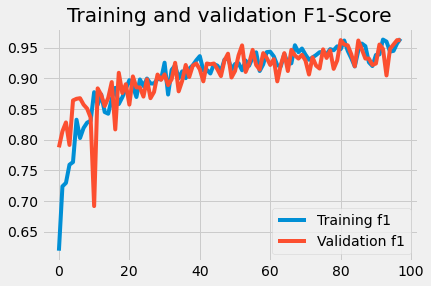

5/5 - 13s - loss: 0.1614 - accuracy: 0.9470 - recall: 0.9242 - precision: 0.9683 - 13s/epoch - 3s/step


[0.16136877238750458,
 0.9469696879386902,
 0.9242424368858337,
 0.9682539701461792]

In [63]:
plot_performance(history)
model.evaluate(val_g, workers = 8, verbose = 2)

In [64]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 256, 256, 64)      9472      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 128, 128, 128)     204928    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 32, 32, 256)     

In [65]:
model.save('MODEL/04_June_CNN_Less_Data_Augmentation_low_learning_rate_Dropout.h5')

## Model 13: Less Data Augmentation + DropOut + After ConV 

In [67]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(64, 7, activation = 'relu', padding = 'same', input_shape=INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 5, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, 3, activation = 'relu', padding = 'same'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics=['accuracy', 'Recall', 'Precision'])


# make directory for logs
logdir = os.path.join('C:/Users/mnis9/Seal Eng Image/CV-gpu/logs', model_name)
#os.mkdir(logdir)

# early stopping
cp = EarlyStopping(monitor ='val_loss', mode = 'min', verbose = 2, patience = PATIENCE, restore_best_weights=True)

mc = ModelCheckpoint(model_name, monitor = 'val_loss', mode = 'min', verbose = 2, save_best_only = True)

tsb = TensorBoard(log_dir=logdir)

# training
start = timer()

# Fit the model 
history= model.fit(train_g3, 
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_g),
                   validation_data=val_g,
                   validation_steps=len(val_g), 
                   callbacks= [cp, mc, tsb])

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 3.1413 - accuracy: 0.5571 - recall: 0.3460 - precision: 0.5989
Epoch 1: val_loss improved from inf to 0.51939, saving model to 02_June_CNN.h5
20/20 [==============================] - 214s 10s/step - loss: 3.1413 - accuracy: 0.5571 - recall: 0.3460 - precision: 0.5989 - val_loss: 0.5194 - val_accuracy: 0.8106 - val_recall: 0.6364 - val_precision: 0.9767
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.5549 - accuracy: 0.7587 - recall: 0.6603 - precision: 0.8221
Epoch 2: val_loss did not improve from 0.51939
20/20 [==============================] - 205s 10s/step - loss: 0.5549 - accuracy: 0.7587 - recall: 0.6603 - precision: 0.8221 - val_loss: 0.5366 - val_accuracy: 0.6970 - val_recall: 0.4242 - val_precision: 0.9333
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.5381 - accuracy: 0.7159 - recall: 0.6698 - precision: 0.7378
Epoch 3: val_loss improved from 0.51939 to 0.41181, 

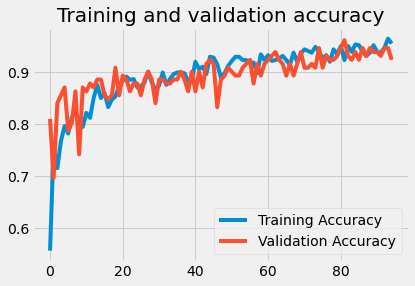

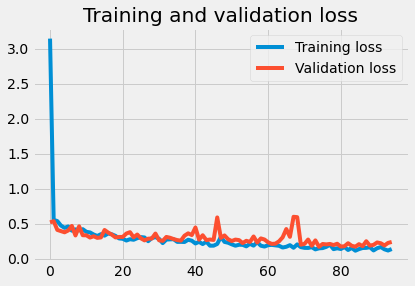

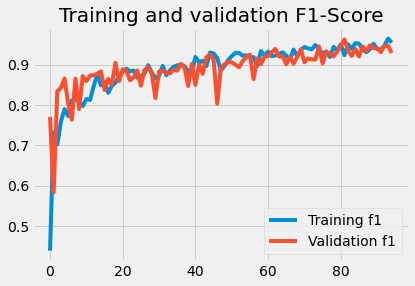

5/5 - 15s - loss: 0.1711 - accuracy: 0.9470 - recall: 0.9242 - precision: 0.9683 - 15s/epoch - 3s/step


[0.17112547159194946,
 0.9469696879386902,
 0.9242424368858337,
 0.9682539701461792]

In [68]:
plot_performance(history)
model.evaluate(val_g, workers = 8, verbose = 2)

In [69]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 256, 256, 64)      9472      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 128, 128, 128)     204928    
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 32, 32, 256)     

In [70]:
model.save('MODEL/04_June_CNN_Less_Data_Augmentation_Adam_low_learning_rate.h5')

## Model 14: Less Data Augmentation + ADAM (amsgrad)

In [ ]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape=INPUT_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, 5, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, 3, activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2048, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(amsgrad = True),
              metrics=['accuracy', 'Recall', 'Precision'])


# make directory for logs
logdir = os.path.join('C:/Users/mnis9/Seal Eng Image/CV-gpu/logs', model_name)
#os.mkdir(logdir)

# early stopping
cp = EarlyStopping(monitor ='val_loss', mode = 'min', verbose = 2, patience = PATIENCE, restore_best_weights=True)

mc = ModelCheckpoint(model_name, monitor = 'val_loss', mode = 'min', verbose = 2, save_best_only = True)

tsb = TensorBoard(log_dir=logdir)

# training
start = timer()

# Fit the model 
history= model.fit(train_g3, 
                   epochs=EPOCHS,
                   steps_per_epoch=len(train_g),
                   validation_data=val_g,
                   validation_steps=len(val_g), 
                   callbacks= [cp, mc, tsb])

end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.7451 - accuracy: 0.5952 - recall: 0.7238 - precision: 0.5758
Epoch 1: val_loss improved from inf to 0.64515, saving model to 02_June_CNN.h5
20/20 [==============================] - 110s 5s/step - loss: 0.7451 - accuracy: 0.5952 - recall: 0.7238 - precision: 0.5758 - val_loss: 0.6451 - val_accuracy: 0.5000 - val_recall: 1.0000 - val_precision: 0.5000
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.5401 - accuracy: 0.6810 - recall: 0.7746 - precision: 0.6524
Epoch 2: val_loss improved from 0.64515 to 0.57741, saving model to 02_June_CNN.h5
20/20 [==============================] - 103s 5s/step - loss: 0.5401 - accuracy: 0.6810 - recall: 0.7746 - precision: 0.6524 - val_loss: 0.5774 - val_accuracy: 0.7879 - val_recall: 0.8182 - val_precision: 0.7714
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.4918 - accuracy: 0.7540 - recall: 0.6095 - precision: 0.8571
Epoch 3: val_loss 

In [ ]:
plot_performance(history)
model.evaluate(val_g, workers = 8, verbose = 2)

In [ ]:
model.summary()

In [ ]:
model.save('MODEL/04_June_CNN_Less_Data_Augmentation_Adam_amsgrad_true.h5')

## Review

In [25]:
model_final = models.load_model('MODEL/02_June_CNN_Data_Augmentation_updated_layer.h5')

In [26]:
model_final.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 64)      9472      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 128)     204928    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 256)     

In [27]:
model_final.evaluate(test_g, verbose = 2, workers = 8)

5/5 - 11s - loss: 0.1053 - accuracy: 0.9627 - recall: 0.9552 - precision: 0.9697 - 11s/epoch - 2s/step


[0.10532870143651962,
 0.9626865386962891,
 0.9552238583564758,
 0.9696969985961914]

## Making an Prediction with the trained model


In [28]:
# Classes we're working with
print(class_names)

['nok' 'ok']


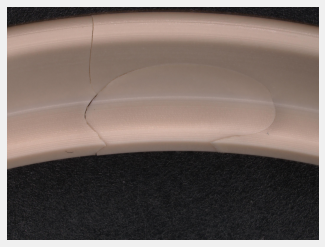

In [30]:
# View our example image
ok_image = mpimg.imread(r"C:\Users\mnis9\Seal Eng Image\CV-gpu\All images\Image888.jpg")
plt.imshow(ok_image)
plt.axis(False);

# "C:\Users\mnis9\Seal Eng Image\CV-gpu\All images\Image888.jpg"

In [31]:
# Check the shape of our image
ok_image.shape

(2160, 2880, 3)

In [32]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=256):
    """
    Reads an image from filename, turns it into a tensor
    and reshapes it to (img_shape, img_shape, colour_channel).
    """
    # Read in target file (an image)
    img = tf.io.read_file(filename)
    
    # Decode the read file into a tensor & ensure 3 colour channels 
    # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
    img = tf.image.decode_image(img, channels=3)
    
    # Resize the image (to the same size our model was trained on)
    img = tf.image.resize(img, size = [img_shape, img_shape])
    
    # Rescale the image (get all values between 0 and 1)
    
    img = img/255.
    return img

In [33]:
# Load in and preprocess our custom image
nok_image = load_and_prep_image("C:/Users/mnis9/Seal Eng Image/CV-gpu/All images/Image888.jpg")
nok_image

# "C:\Users\mnis9\Seal Eng Image\CV-gpu\final_dataset\training\nok\NOK_FL_0.jpg"
# r"C:\Users\mnis9\Seal Eng Image\CV-gpu\All images\Image888.jpg

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.0894761 , 0.0894761 , 0.08163296],
        [0.06107537, 0.06107537, 0.0689185 ],
        [0.05142463, 0.05142463, 0.05926777],
        ...,
        [0.06763174, 0.06763174, 0.06542586],
        [0.06490503, 0.0616728 , 0.0802696 ],
        [0.17585784, 0.18590686, 0.18419118]],

       [[0.14880514, 0.15272671, 0.1286152 ],
        [0.07244179, 0.06999081, 0.08518688],
        [0.07542892, 0.07542892, 0.08327206],
        ...,
        [0.20062806, 0.20101103, 0.192019  ],
        [0.18429841, 0.18305759, 0.19385724],
        [0.10079657, 0.09295343, 0.10471813]],

       [[0.0743413 , 0.0743413 , 0.07532169],
        [0.08259804, 0.08259804, 0.0747549 ],
        [0.24255514, 0.24255514, 0.24549632],
        ...,
        [0.08414522, 0.08414522, 0.08414522],
        [0.05868566, 0.05868566, 0.05868566],
        [0.04575674, 0.04575674, 0.05359988]],

       ...,

       [[0.12314644, 0.11922488, 0.11138174],
        [0.22

In [35]:
# Add an extra axis
print(f"Shape before new dimension: {nok_image.shape}")
nok_image = tf.expand_dims(nok_image, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {nok_image.shape}")
nok_image

Shape before new dimension: (256, 256, 3)
Shape after new dimension: (1, 256, 256, 3)


<tf.Tensor: shape=(1, 256, 256, 3), dtype=float32, numpy=
array([[[[0.0894761 , 0.0894761 , 0.08163296],
         [0.06107537, 0.06107537, 0.0689185 ],
         [0.05142463, 0.05142463, 0.05926777],
         ...,
         [0.06763174, 0.06763174, 0.06542586],
         [0.06490503, 0.0616728 , 0.0802696 ],
         [0.17585784, 0.18590686, 0.18419118]],

        [[0.14880514, 0.15272671, 0.1286152 ],
         [0.07244179, 0.06999081, 0.08518688],
         [0.07542892, 0.07542892, 0.08327206],
         ...,
         [0.20062806, 0.20101103, 0.192019  ],
         [0.18429841, 0.18305759, 0.19385724],
         [0.10079657, 0.09295343, 0.10471813]],

        [[0.0743413 , 0.0743413 , 0.07532169],
         [0.08259804, 0.08259804, 0.0747549 ],
         [0.24255514, 0.24255514, 0.24549632],
         ...,
         [0.08414522, 0.08414522, 0.08414522],
         [0.05868566, 0.05868566, 0.05868566],
         [0.04575674, 0.04575674, 0.05359988]],

        ...,

        [[0.12314644, 0.11922488, 

In [36]:
# Make a prediction on custom image tensor
pred = model.predict(nok_image)
pred

1/1 [==============================] - 1s 700ms/step


array([[0.05339757]], dtype=float32)

In [37]:
# Remind ourselves of our class names
class_names

array(['nok', 'ok'], dtype='<U3')

In [38]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'nok'

In [39]:
def pred_and_plot(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred)[0][0])]
    
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

In [40]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'nok'

In [41]:
def pred_and_plot(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred)[0][0])]
    
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 174ms/step


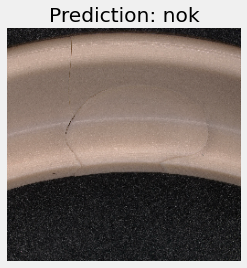

In [42]:
# Test our model on a custom image
pred_and_plot(model_final, r"C:\Users\mnis9\Seal Eng Image\CV-gpu\All images\Image888.jpg", class_names)

# "C:\Users\mnis9\Seal Eng Image\CV-gpu\All images\Image94.jpg"

1/1 [==============================] - 0s 96ms/step


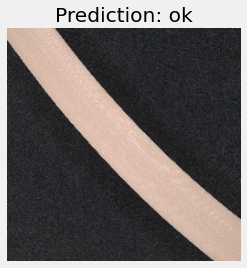

In [43]:
# Download another test image and make a prediction on it
pred_and_plot(model_final, r"C:\Users\mnis9\Seal Eng Image\CV-gpu\All images\Image580.jpg", class_names)

## Evaluation

Using a model with 94% accuracy, we'll take a look at where our model failed.


In [45]:
test_g0 = image.ImageDataGenerator(rescale = 1/255)

def get_pred(path):
    filelist = os.listdir(path)
    result = {}

    for fn in filelist:
        image_ = image.load_img(f'{path}/{fn}', 
                                target_size = (256, 256), 
                                color_mode='rgb')
        input_ = np.array([image.img_to_array(image_)])
        input_f = test_g0.flow(input_)
        result[fn] = int(np.where(model.predict(input_f)[0] > 0.5, 1, 0))
    return result

In [46]:
# C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/training
Neg_class_preds = get_pred('C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/testing/nok')
Pos_class_preds = get_pred('C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/testing/ok')

1/1 [==============================] - 0s 141ms/step


In [47]:
FP_list = [k for k, v in Neg_class_preds.items() if v != 0]
FN_list = [k for k, v in Pos_class_preds.items() if v != 1]

# Confusion Matrix

In [48]:
# getting numbers for confusion matrix
FP = len(FP_list)
FN = len(FN_list)
TP = len(Pos_class_preds) - FP
TN = len(Neg_class_preds) - FN

In [49]:
TP, FN, FP, TN

(65, 3, 2, 64)

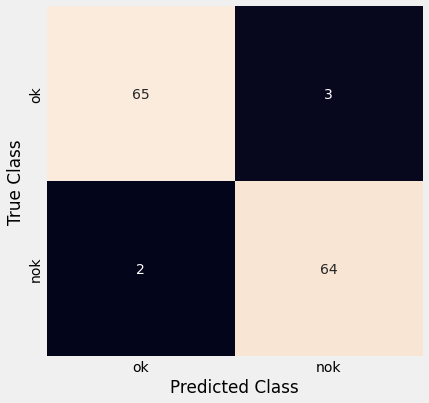

In [50]:
import seaborn as sns
cm = [[TP, FN], [FP, TN]]
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot=True, fmt="d", cbar = False, xticklabels=['ok', 'nok'], yticklabels = ['ok', 'nok'])
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Sample Wrong Predictions

In [51]:
def plot_img(path, title):
    fn = image.load_img(path, color_mode='rgb')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(title)
    plt.axis('off')
    plt.show()

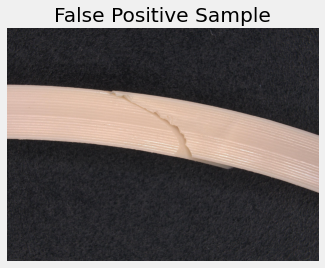

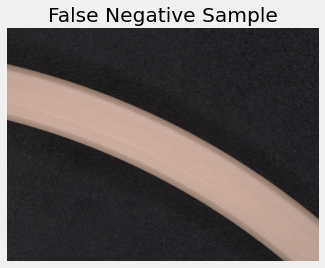

In [52]:
plot_img(f'C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/testing/nok/{np.random.choice(FP_list, 1)[0]}', 'False Positive Sample')
plot_img(f'C:/Users/mnis9/Seal Eng Image/CV-gpu/final_dataset/testing/ok/{np.random.choice(FN_list, 1)[0]}', 'False Negative Sample')